In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
!pip install pyclustertend
import pyclustertend
import plotly.express as px

In [51]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
# Store data into dataframe
df = pd.read_csv("/content/drive/MyDrive/orders_g.csv")
df = df.drop('Unnamed: 0', axis=1)

In [53]:
pd.DataFrame(df)
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.head(100)

,date,CustomerId,country,InvoiceId,SKU,productPrice,productQuantity
0,2021-07-28,0st8d3SDdJCWIQmL5+11vg==,France,1qz/Ge3Ms39aGKZI2ulMng==,ckzzGMGdcn6Cbc7XMEe2dQ==,4.50,2
1,2021-07-17,4KX4rwULGxeiZDJjmJeAMQ==,France,ZaxG39suXkHC2L/dLR2NOw==,49pMRqNRjlL7y5T7/3WyFw==,7.33,1
2,2021-03-10,SlLOajO7Y6YGKOdApOqqCg==,France,9VULNYCw09HT/duYYE+6PQ==,pwfkRBxMofN0Cw/RQvbxwA==,35.70,2
3,2021-11-27,mODRuFGPrPM/8goR3sw1+Q==,France,mwBPoBbyHllOHvI+sGqb5g==,Jj4gY/4JRr2fGW/mrThoTw==,77.94,4
4,2022-01-18,fROfQ3NF0iSZJERpmSOnBg==,France,gREqwAU4ZxOGdjQCp/vqHQ==,qAhLKjgtTXRJXIkldBVkfg==,6.74,1
...,...,...,...,...,...,...,...
95,2021-02-27,yJa2DeMBObeRaEiGTRNkoQ==,France,B8RfvFLjzdNwT8l6BKEdfA==,bTdLuUC3s3HDbECiVISuew==,23.97,2
96,2021-01-21,JVgQFU6momy8f8i3twO94w==,France,gx61Z63EwGvyDmn2GkMrlw==,h8UBQhGLYcnYeOEdS4G3dA==,2.70,2
97,2021-01-21,wNOXDTFhKKeqk1tDMCWCQg==,France,xUfEsmi/SkqCiVF5prc5Yw==,xJTKfAYyDncY7o1IJeuSTQ==,7.33,1
98,2021-08-30,LGQVas0kfSj2fh1LXiVU/Q==,France,sTclp7nDrx0CCHGxTqRWjw==,0LdqpWCse6skdk9IifogZQ==,26.95,3


In [54]:
df['R'] = df['date'].max() - df['date']
RFM = df.groupby('CustomerId').agg({'R' :['min']})
pd.DataFrame(RFM)

,R
,min
CustomerId,
+++SJgx/2IJ+dXq7vF8COg==,109 days
+++aKiAiXhTfaqCLC/kyWA==,366 days
++/G67YHZTMKdpvANeYPLw==,427 days
++/GTDXvJzF11ZIUz81SPg==,202 days
++0Dxza60/nPDbfORBYuuA==,19 days
...,...
zzyyHmcBdlPu2LT05kFnrQ==,232 days
zzz2aWARN6OJELfdgOZpWw==,35 days


In [55]:
df.groupby('CustomerId')['InvoiceId'].agg('count')

CustomerId
+++SJgx/2IJ+dXq7vF8COg==     3
+++aKiAiXhTfaqCLC/kyWA==     2
++/G67YHZTMKdpvANeYPLw==    46
++/GTDXvJzF11ZIUz81SPg==     3
++0Dxza60/nPDbfORBYuuA==     6
                            ..
zzyyHmcBdlPu2LT05kFnrQ==     7
zzz2aWARN6OJELfdgOZpWw==     6
zzzCCNCA1718e2kRryHpJQ==     3
zzzj3hW4oytUbaZbp6hqiw==     3
zzzkp+wC5LHXLSmDg2F9Fg==    10
Name: InvoiceId, Length: 525348, dtype: int64

In [56]:
df_sub1 = df.loc[df['CustomerId'] == '+++SJgx/2IJ+dXq7vF8COg==']
print(df_sub1) 

             date                CustomerId country                 InvoiceId  \
237328 2021-11-28  +++SJgx/2IJ+dXq7vF8COg==   Spain  SaUUoYsZiMIS3xlv6BHqaA==   
504598 2021-11-28  +++SJgx/2IJ+dXq7vF8COg==   Spain  SaUUoYsZiMIS3xlv6BHqaA==   
944547 2021-11-28  +++SJgx/2IJ+dXq7vF8COg==   Spain  SaUUoYsZiMIS3xlv6BHqaA==   

                             SKU  productPrice  productQuantity        R  
237328  KD8gVxMvnTCVNPziLxM9qw==         17.96                3 109 days  
504598  EtL0UCBNtp6hAWSmWBkRrw==         35.95                3 109 days  
944547  opuR3MdHL3tcVHH2WNUcjg==         10.48                1 109 days  


In [57]:
f_df = df.drop_duplicates().groupby(
    by=['CustomerId'], as_index=False)['InvoiceId'].count()
f_df.columns = ['CustomerId','Frequency']
f_df.set_index('CustomerId', inplace = True)
f_df.head(100)

,Frequency
CustomerId,
+++SJgx/2IJ+dXq7vF8COg==,3
+++aKiAiXhTfaqCLC/kyWA==,2
++/G67YHZTMKdpvANeYPLw==,46
++/GTDXvJzF11ZIUz81SPg==,3
++0Dxza60/nPDbfORBYuuA==,6
...,...
++pAhjjb66ylTI1MP2KZTQ==,7
++pCYFwkxTnHCSBQ4sRzyQ==,3
++pM0pAMw0W0bEX0kKiyng==,5


In [58]:
df['TotRevenue'] = df['productPrice'] * df['productQuantity']
m_df = df.groupby(by='CustomerId', as_index=False)['TotRevenue'].sum()
m_df.columns = ['CustomerId', 'Monetary']
m_df.set_index('CustomerId', inplace = True)
m_df.head(100)

,Monetary
CustomerId,
+++SJgx/2IJ+dXq7vF8COg==,172.21
+++aKiAiXhTfaqCLC/kyWA==,29.94
++/G67YHZTMKdpvANeYPLw==,884.61
++/GTDXvJzF11ZIUz81SPg==,59.91
++0Dxza60/nPDbfORBYuuA==,632.94
...,...
++pAhjjb66ylTI1MP2KZTQ==,26.55
++pCYFwkxTnHCSBQ4sRzyQ==,543.62
++pM0pAMw0W0bEX0kKiyng==,70.83


In [59]:
RFM['F'] = f_df['Frequency']
RFM['M'] = m_df['Monetary']

In [60]:
RFM['R_rank'] = RFM['R'].rank(ascending=False)
RFM['F_rank'] = RFM['F'].rank(ascending=True)
RFM['M_rank'] = RFM['M'].rank(ascending=True)
 
# normalizing the rank of the customers
RFM['R_rank_norm'] = (RFM['R_rank']/RFM['R_rank'].max())*100
RFM['F_rank_norm'] = (RFM['F_rank']/RFM['F_rank'].max())*100
RFM['M_rank_norm'] = (RFM['M_rank']/RFM['M_rank'].max())*100
 
RFM.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

pd.DataFrame(df)

RFM.head()

,R,F,M,R_rank_norm,F_rank_norm,M_rank_norm
,min,,,,,
CustomerId,,,,,,
+++SJgx/2IJ+dXq7vF8COg==,109 days,3,172.21,65.255962,16.903081,44.034526
+++aKiAiXhTfaqCLC/kyWA==,366 days,2,29.94,18.670723,7.838328,2.028846
++/G67YHZTMKdpvANeYPLw==,427 days,46,884.61,3.075902,99.010656,80.310385
++/GTDXvJzF11ZIUz81SPg==,202 days,3,59.91,45.473288,16.903081,18.949249
++0Dxza60/nPDbfORBYuuA==,19 days,6,632.94,93.995732,54.858684,74.279811


In [61]:
RFM1 = RFM.iloc[:,3:6]
RFM1.head()

,R_rank_norm,F_rank_norm,M_rank_norm
,,,
CustomerId,,,
+++SJgx/2IJ+dXq7vF8COg==,65.255962,16.903081,44.034526
+++aKiAiXhTfaqCLC/kyWA==,18.670723,7.838328,2.028846
++/G67YHZTMKdpvANeYPLw==,3.075902,99.010656,80.310385
++/GTDXvJzF11ZIUz81SPg==,45.473288,16.903081,18.949249
++0Dxza60/nPDbfORBYuuA==,93.995732,54.858684,74.279811


In [62]:
model = KMeans(n_clusters=7)
model.fit(RFM1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



KMeans(n_clusters=7)

In [63]:
np.unique(model.labels_)
x = model.labels_
Cc = pd.DataFrame(x)
Cc.index=RFM1.index
RFM1['Id'] = Cc[0]
RFM1.head()

,R_rank_norm,F_rank_norm,M_rank_norm,Id
,,,,
CustomerId,,,,
+++SJgx/2IJ+dXq7vF8COg==,65.255962,16.903081,44.034526,5
+++aKiAiXhTfaqCLC/kyWA==,18.670723,7.838328,2.028846,1
++/G67YHZTMKdpvANeYPLw==,3.075902,99.010656,80.310385,3
++/GTDXvJzF11ZIUz81SPg==,45.473288,16.903081,18.949249,1
++0Dxza60/nPDbfORBYuuA==,93.995732,54.858684,74.279811,0


In [64]:
rrrr = RFM1.sample(n=4000)
rrrr.head(100)

,R_rank_norm,F_rank_norm,M_rank_norm,Id
,,,,
CustomerId,,,,
gPSWE0ugZGVEA8LeRhdIZQ==,6.734432,7.838328,14.377708,1
pqo9bM+Rmtgqa2w/4v8mAg==,6.989147,85.342954,78.681369,3
cP+S+zuwUQP4WbfWGJYzyA==,82.841766,29.385569,19.385055,5
UDEZCpOl6rkNlr4gTEIbow==,58.127750,54.858684,71.561708,4
JYIsc2MtXCEzGRFCgtQ95g==,52.210290,2.202635,22.171970,1
...,...,...,...,...
hwhaAyR6MoTpr2ZFrqkpRA==,33.295608,16.903081,66.096949,6
pyiKeGJfgSipGkJrvowXFg==,84.504838,64.235326,15.185363,5


In [65]:
fig1 = px.scatter_3d(rrrr, x = 'R_rank_norm', y = 'F_rank_norm', z = 'M_rank_norm',color = 'Id')
fig1.show()

In [76]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(RFM1)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names th

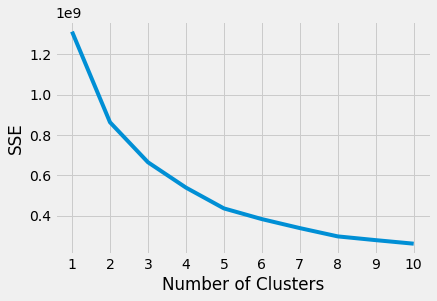

In [78]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()